In [1]:
import pandas as pd
import spacy
# import re

## Date unification

For the final dataset we need to drop the artefacts of consecutively loading the channels and drop the extra dates that are not present in all the channels we track.

In [2]:
%%time
df = pd.read_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/datasets/df_channels_only_messages.csv')

CPU times: user 1min 54s, sys: 55 s, total: 2min 49s
Wall time: 7min 9s


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
%%time
df['date_formatted'] = pd.to_datetime(df['date'])

CPU times: user 1.3 s, sys: 434 ms, total: 1.73 s
Wall time: 5 s


In [5]:
grouped = df.groupby('channel_name')['date_formatted'].agg(['min', 'max'])

In [6]:
latest_common_post_date = grouped['max'].min()

In [7]:
print(f"The last common date for all the channels is {latest_common_post_date}")

The last common date for all the channels is 2022-11-25 18:09:00+00:00


In [8]:
print(f"We lose {len(df[df['date_formatted']>latest_common_post_date])/len(df)*100:.2f}% of posts after balancing by the final date")

We lose 2.35% of posts after balancing by the final date


In [9]:
print(f"The earliest post is dated {df['date_formatted'].min()}")

The earliest post is dated 2015-09-22 16:12:02+00:00


In [10]:
print(f"The latest post is dated {df['date_formatted'].max()}")

The latest post is dated 2022-12-26 10:59:50+00:00


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df.set_index('date_formatted', inplace=True)

<Axes: title={'center': 'Dynamics of Posts over Time (Aggregated by Month)'}, xlabel='Month', ylabel='Number of Posts'>

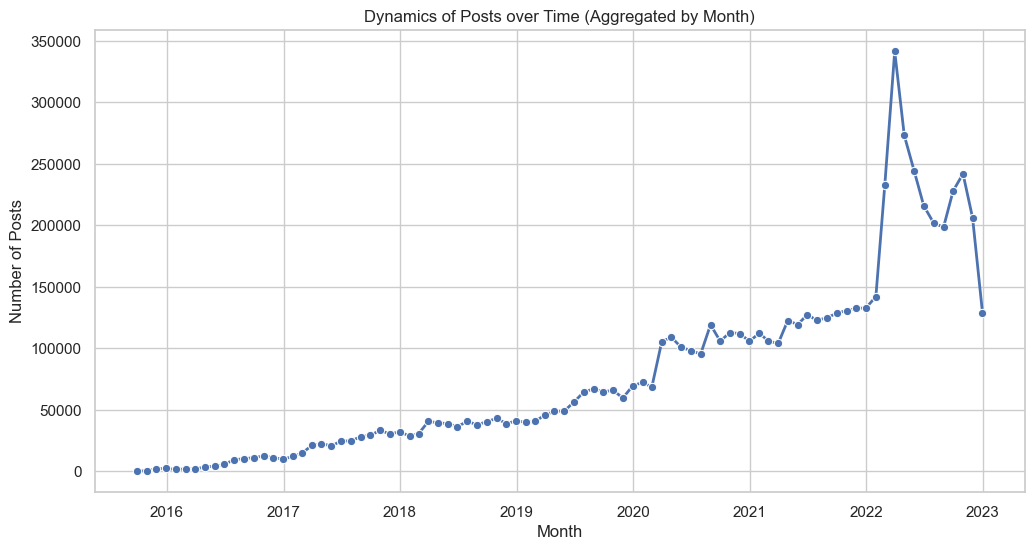

In [12]:
monthly_posts = df.resample('M').size()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=monthly_posts.index, y=monthly_posts.values, marker='o', linewidth=2)
ax.set(xlabel='Month', ylabel='Number of Posts', title='Dynamics of Posts over Time (Aggregated by Month)')
ax

In [60]:
df['message'].iloc[8]

'Проверенный лайфхак, который растопит сердце любой девушки.  Берешь ее фотографию, отправляешь сюда и получаешь крутой портрет, который потом даришь ей!  Хочешь извиниться? Портрет поможет! Хочешь сказать ей какая она красивая? Портрет расскажет! Хочешь удивить сюрпризом? Портрет то что надо!  Переходи и радуй свою любимую!'

In [15]:
plt.savefig('/Users/katerynaburovova/PycharmProjects/dehumanization/data/graphs/posts_dynamics_by_month_seaborn.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [14]:
daily_posts_per_author = df.groupby(['channel_name', df.index.date]).size()

# Find the date of the first post for each author
first_post_date = df.reset_index().groupby('channel_name')['date_formatted'].min()
# Calculate the number of days since the first post for each author
days_since_first_post = ((df.index.max() - first_post_date).apply(pd.Timedelta.total_seconds) / 86400).astype(int)
# Calculate the total number of posts per author
total_posts_per_author = df.groupby('channel_name').size()

adjusted_mean_daily_posts_per_author = total_posts_per_author / days_since_first_post
sorted_authors = adjusted_mean_daily_posts_per_author.sort_values(ascending=False)

In [15]:
len(df[df['channel_name']=='karaulny'])

391776

In [16]:
days_since_first_post.sort_values(ascending=False)

channel_name
kashinguru         2651
varlamov           2651
otsuka_bld         2651
izvestia           2649
tvrain             2648
                   ... 
momdontread         268
glava_lnr_info      265
razvedkavperedZ     193
achexd2             134
zhogaartem           94
Name: date_formatted, Length: 299, dtype: int64

In [17]:
# Display the top 10 authors
print("Top 10 Authors:")
print(sorted_authors.head(10))

# Display the bottom 10 authors
print("\nBottom 10 Authors:")
print(sorted_authors.tail(10))

Top 10 Authors:
channel_name
karaulny           179.713761
glavmedia          151.059655
bbbreaking          95.152787
SolovievLive        94.499614
radiogovoritmsk     89.152846
denazi_UA           86.501639
ssigny              85.202381
rian_ru             80.436971
Ateobreaking        72.136454
swodki              71.134808
dtype: float64

Bottom 10 Authors:
channel_name
medvedev_telegram    0.735915
TheBadComedian       0.688833
corrkosarev          0.603010
vv_volodin           0.583717
msgazdiev            0.562908
olegderipaska        0.377799
kryuchkovoleg        0.334313
pgubarev             0.205870
freeman365           0.121614
yurydud              0.081081
dtype: float64


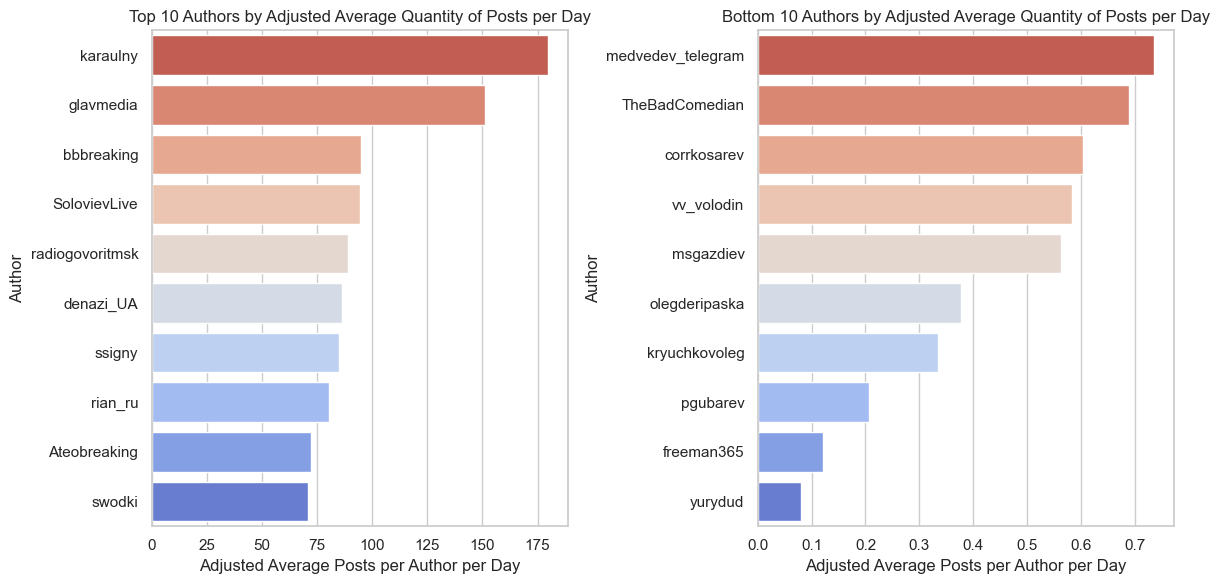

In [31]:
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x=sorted_authors.head(10).values, y=sorted_authors.head(10).index, orient='h', palette="coolwarm_r", ax=ax1)
ax1.set_xlabel('Adjusted Average Posts per Author per Day')
ax1.set_ylabel('Author')
ax1.set_title('Top 10 Authors by Adjusted Average Quantity of Posts per Day')
sns.barplot(x=sorted_authors.tail(10).values, y=sorted_authors.tail(10).index, orient='h', palette="coolwarm_r", ax=ax2)
ax2.set_xlabel('Adjusted Average Posts per Author per Day')
ax2.set_ylabel('Author')
ax2.set_title('Bottom 10 Authors by Adjusted Average Quantity of Posts per Day')
plt.tight_layout()

# plt.savefig('separate_top_and_bottom_authors_adjusted_average_posts_per_day.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
plt.savefig('side_by_side_top_and_bottom_authors_adjusted_average_posts_per_day.png', dpi=300, bbox_inches='tight')

In [33]:
df

,id,date,message,channel_name,lang,message_no_hashtags
date_formatted,,,,,,
2022-12-15 16:32:15+00:00,12347.0,2022-12-15 16:32:15+00:00,А трансляция тем временем идет. Подписывайтесь...,mardanaka,ru,А трансляция тем временем идет. Подписывайтесь
2022-12-15 15:00:03+00:00,12346.0,2022-12-15 15:00:03+00:00,"В России ещё есть те, кто способен возрождать ...",mardanaka,ru,"В России ещё есть те, кто способен возрождать ..."
2022-12-15 14:21:22+00:00,12345.0,2022-12-15 14:21:22+00:00,«Катаргейт» набирает обороты - Обвиняемая в ко...,mardanaka,ru,"""Катаргейт"" набирает обороты - Обвиняемая в ко..."
2022-12-15 13:08:35+00:00,12344.0,2022-12-15 13:08:35+00:00,🔥В гостях у @Metametrica побывали товарищи из ...,mardanaka,ru,В гостях у побывали товарищи из украинского п...
2022-12-15 12:31:23+00:00,12343.0,2022-12-15 12:31:23+00:00,Глава Минобороны Грузии назвал грузинских наем...,mardanaka,ru,Глава Минобороны Грузии назвал грузинских наем...
...,...,...,...,...,...,...
2018-10-18 14:18:13+00:00,8.0,2018-10-18 14:18:13+00:00,Мария Топилина – муж – Максим Топилин – минист...,bloodysx,ru,Мария Топилина – муж – Максим Топилин – минист...
2018-10-18 14:17:44+00:00,7.0,2018-10-18 14:17:44+00:00,"Людмила Красноштанова – муж – член «ЕдРа», деп...",bloodysx,ru,"Людмила Красноштанова – муж – член ""ЕдРа"", деп..."
2018-10-18 14:16:00+00:00,6.0,2018-10-18 14:16:00+00:00,"И, на всякий случай, если вы все проспали, дуб...",bloodysx,ru,"И, на всякий случай, если вы все проспали, дуб..."


In [44]:
daily_posts_per_author = df.groupby(['channel_name', df.index.date]).size().reset_index(name='posts')

# Rename the column containing the date information to 'date_formatted'
daily_posts_per_author.columns = ['channel_name', 'date_formatted', 'posts']

# Convert 'date_formatted' column to datetime object
daily_posts_per_author['date_formatted'] = pd.to_datetime(daily_posts_per_author['date_formatted'])

In [45]:
# Find the date of the first post for each author
first_post_date = df.reset_index().groupby('channel_name')['date'].min()

# Filter out the authors who did not make their first post by the date
daily_posts_per_author_filtered = daily_posts_per_author[daily_posts_per_author['channel_name'].isin(first_post_date.index)]

# Set the index to the 'date_formatted' column in 'daily_posts_per_author_filtered'
daily_posts_per_author_filtered.set_index('date_formatted', inplace=True)

In [46]:
len(df)

6836544

In [47]:
# Calculate the median value of daily posts per author per day
median_daily_posts_per_author = daily_posts_per_author_filtered.groupby(['channel_name']).resample('D')['posts'].median().reset_index()

# Set the index to the 'date_formatted' column in 'median_daily_posts_per_author'
median_daily_posts_per_author['date_formatted'] = pd.to_datetime(median_daily_posts_per_author['date_formatted'])
median_daily_posts_per_author.set_index('date_formatted', inplace=True)

# Calculate the average median daily posts per author per month
avg_median_daily_posts_per_month = median_daily_posts_per_author.groupby('channel_name').resample('M')['posts'].mean().reset_index()

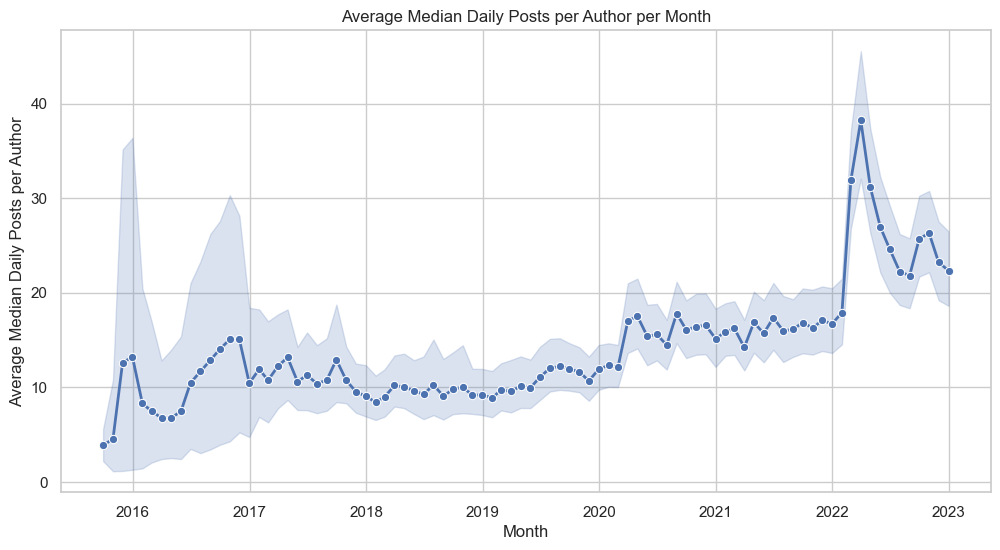

In [48]:
# Plot the average median daily posts per author per month
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="date_formatted", y="posts", data=avg_median_daily_posts_per_month, marker='o', linewidth=2)
ax.set(xlabel='Month', ylabel='Average Median Daily Posts per Author', title='Average Median Daily Posts per Author per Month')
plt.show()

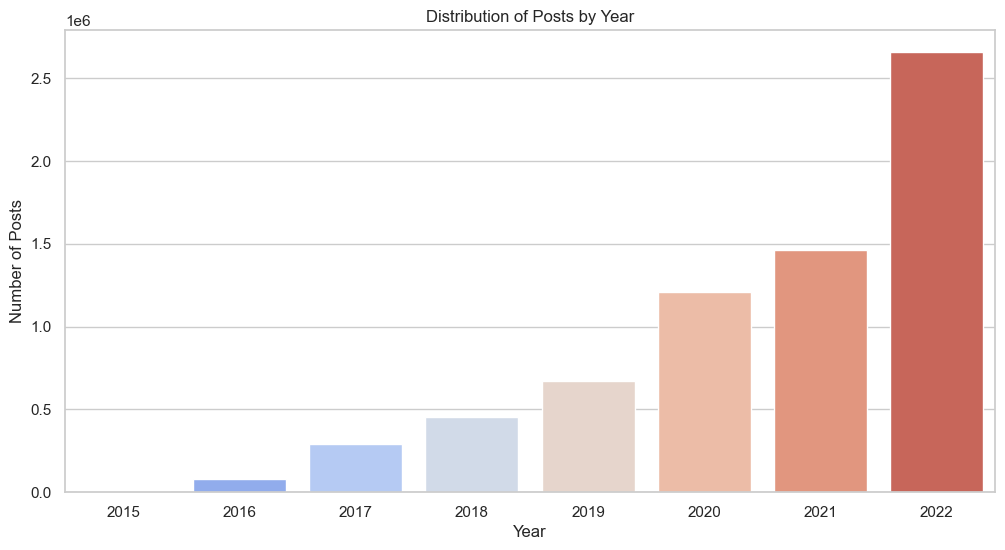

In [62]:
posts_by_year = df.resample('Y').size().reset_index(name='posts')
posts_by_year.columns = ['year', 'posts']

posts_by_year['year'] = posts_by_year['year'].dt.year

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="year", y="posts", data=posts_by_year, palette="coolwarm")
ax.set(xlabel='Year', ylabel='Number of Posts', title='Distribution of Posts by Year')
plt.show()

In [75]:
import numpy as np
from tokenize_uk import tokenize_sents
sample_size = 100000
random_sample = df.sample(sample_size, random_state=42)
sentence_lengths = []
for text in random_sample['message']:
    sentences = tokenize_sents(text)
    sentence_lengths.append(len(sentences))

In [67]:
median_length = np.median(sentence_lengths)
mean_length = np.mean(sentence_lengths)
print("Median length of posts in sentences:", median_length)
print("Mean length of posts in sentences:", mean_length)

Median length of posts in sentences: 2.0
Mean length of posts in sentences: 3.49828


/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_2048/1225807643.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(sentence_lengths, bins=50, kde=False, palette="coolwarm")


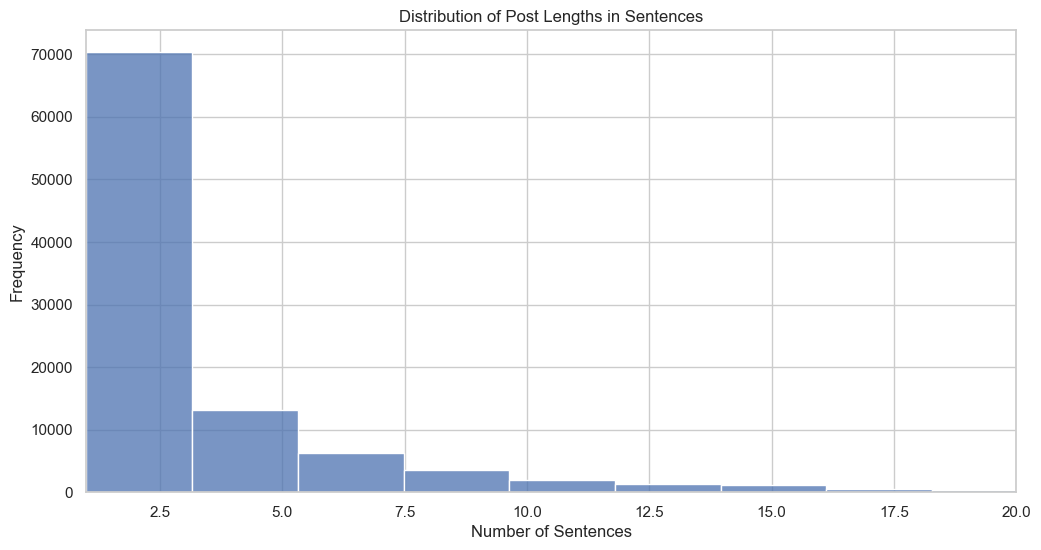

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.histplot(sentence_lengths, bins=50, kde=False, palette="coolwarm")
ax.set(xlabel='Number of Sentences', ylabel='Frequency', title='Distribution of Post Lengths in Sentences')
ax.set_xlim(1, 20)
plt.show()


In [68]:
mean_length * len(df)

23916145.14432

In [87]:
df_smpl = pd.read_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/data/merged_dataset/df_channels_sample3.csv', index_col=[0])

In [117]:
df_smpl.reactions.iloc[11]

"MessageReactions(results=[ReactionCount(reaction=ReactionEmoji(emoticon='👍'), count=1049, chosen_order=None), ReactionCount(reaction=ReactionEmoji(emoticon='👎'), count=129, chosen_order=None), ReactionCount(reaction=ReactionEmoji(emoticon='🔥'), count=68, chosen_order=None), ReactionCount(reaction=ReactionEmoji(emoticon='😢'), count=2, chosen_order=None)], min=False, can_see_list=False, recent_reactions=[])"

## Final cleanup

In [31]:
def clean_text(string, allowed_symbols):
    getVals = list(filter(lambda x: x in allowed_symbols, string))
    result = "".join(getVals)

    return result

In [64]:
from string import punctuation

punctuation_minimal = "!(),-.:;?%"

cyrillic_letters = u"абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ"
latin_letters_numbers = "1234567890abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ "
allowed_symbols = cyrillic_letters+latin_letters_numbers+punctuation_minimal
cyrillic_letters_full = u"абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ "

In [51]:
%%time
df['message_no_hashtags'] = df['message_no_hashtags'].astype(str)

CPU times: user 1.36 s, sys: 20.2 s, total: 21.5 s
Wall time: 1min 20s


In [52]:
df = df[df['message_no_hashtags']!='nan']

In [54]:
%%time
df['message_clean'] = df['message_no_hashtags'].apply(lambda x: clean_text(x, allowed_symbols))

CPU times: user 3min 7s, sys: 18.8 s, total: 3min 25s
Wall time: 4min 17s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
# df.to_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/datasets/df_channels_minimal.csv')

In [65]:
%%time
df['message_final'] = df['message_clean'].apply(lambda x: clean_text(x, cyrillic_letters_full).lower())

CPU times: user 3min 14s, sys: 28.1 s, total: 3min 43s
Wall time: 5min 41s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
df['message_final'][10]

'барыга трамп обещает сделать сегодня какоето важное заявление очевидно оно будет рассчитано на американскую аудиторию потому что в европе такой ролик вызвал бы только смех но трамп хорошо знает уровень своих слушателей и избирателей'

In [68]:
df.to_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/datasets/df_channels_final.csv')

In [69]:
df['message_final'][110]

'сегодня в аэропорту абудаби состоялся обмен россиянина виктора бута на американку бриттни грайнер предварительно перед процедурой обмена в абудаби оба они были помилованы это означает что бывшие заключенные не должны отбывать оставшуюся часть наказания у себя на родине    виктор бут был осуждён в  году в сша на  лет тюрьмы за намерение незаконно осуществить торговлю оружием баскетболистка бриттни грайнер попала в российскую тюрьму в конце февраля за провоз вейпа с конопляным маслом получила девять лет'

In [70]:
import spacy
# from spacy.lang.ru.examples import sentences

In [71]:
nlp = spacy.load('ru_core_news_md',disable=['ner', 'attribute_ruler'])

In [73]:
def lemmatize_spacy(text):
    doc = nlp(text)
    result = [token.lemma_ for token in doc]
    return result

In [74]:
lemmatize_spacy(df['message_final'][110])

['сегодня',
 'в',
 'аэропорт',
 'абудаби',
 'состояться',
 'обмен',
 'россиянин',
 'виктор',
 'бут',
 'на',
 'американка',
 'бриттни',
 'грайнер',
 'предварительно',
 'перед',
 'процедура',
 'обмен',
 'в',
 'абудаби',
 'оба',
 'они',
 'были',
 'помиловать',
 'это',
 'означать',
 'что',
 'бывший',
 'заключенные',
 'не',
 'должный',
 'отбывать',
 'остаться',
 'часть',
 'наказание',
 'у',
 'себя',
 'на',
 'родина',
 '   ',
 'виктор',
 'бут',
 'был',
 'осуждён',
 'в',
 ' ',
 'год',
 'в',
 'сша',
 'на',
 ' ',
 'год',
 'тюрьма',
 'за',
 'намерение',
 'незаконно',
 'осуществить',
 'торговля',
 'оружие',
 'баскетболистка',
 'бриттни',
 'грайнер',
 'попасть',
 'в',
 'российский',
 'тюрьма',
 'в',
 'конец',
 'февраль',
 'за',
 'провоз',
 'вейпа',
 'с',
 'конопляный',
 'масло',
 'получить',
 'девять',
 'год']

In [93]:
df_s = df[:10000].copy()

In [94]:
%%time
df_s['lemmas'] = df_s['message_final'].apply(lambda x: lemmatize_spacy(x))

CPU times: user 2min 46s, sys: 1.42 s, total: 2min 47s
Wall time: 2min 47s


In [ ]:
%%time
df['lemmas'] = df['message_final'].apply(lambda x: lemmatize_spacy(x))

In [33]:
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/ruBert-large")
model = AutoModel.from_pretrained("sberbank-ai/ruBert-large")

Downloading:   0%|          | 0.00/591 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Some weights of the model checkpoint at sberbank-ai/ruBert-large were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
encoded_input = tokenizer(sample_sent, padding=True, max_length=150, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)
vector_representations = model_output.last_hidden_state[:, 0, :]

In [35]:
vector_representations

tensor([[-0.1740, -0.2474, -0.5491,  ...,  0.1733,  0.2116, -0.7437],
        [-0.2661, -0.2923, -0.5540,  ...,  0.3703, -0.1817, -0.4969],
        [ 0.1091, -0.1447, -0.1402,  ...,  0.0146, -0.1610,  0.4822],
        [-0.8426, -0.1772, -0.4470,  ...,  0.1441,  0.4308,  0.5061],
        [-0.7749, -0.1168, -0.5872,  ...,  0.1764,  0.4932,  0.7485]])

In [36]:
tokenizer_sent = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-sentence")
model_sent = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [ ]:
encoded_input = tokenizer(sample_sent, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)
vector_representations = model_output.last_hidden_state[:, 0, :]

## Lemmatization with timesteps and post id

In [1]:
import pandas as pd

In [6]:
%%time
df_channels_final = pd.read_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/datasets/df_channels_final.csv')

CPU times: user 3min 33s, sys: 1min 40s, total: 5min 13s
Wall time: 10min 20s


In [2]:
df_channels_final[:5]

,Unnamed: 0,id,date,message,channel_name,lang,message_no_hashtags,date_formatted,message_clean,message_final
0,0,12347.0,2022-12-15 16:32:15+00:00,А трансляция тем временем идет. Подписывайтесь...,mardanaka,ru,А трансляция тем временем идет. Подписывайтесь,2022-12-15 16:32:15+00:00,А трансляция тем временем идет. Подписывайтесь,а трансляция тем временем идет подписывайтесь
1,1,12346.0,2022-12-15 15:00:03+00:00,"В России ещё есть те, кто способен возрождать ...",mardanaka,ru,"В России ещё есть те, кто способен возрождать ...",2022-12-15 15:00:03+00:00,"В России ещё есть те, кто способен возрождать ...",в россии ещё есть те кто способен возрождать н...
2,2,12345.0,2022-12-15 14:21:22+00:00,«Катаргейт» набирает обороты - Обвиняемая в ко...,mardanaka,ru,"""Катаргейт"" набирает обороты - Обвиняемая в ко...",2022-12-15 14:21:22+00:00,Катаргейт набирает обороты - Обвиняемая в корр...,катаргейт набирает обороты обвиняемая в корру...
3,3,12344.0,2022-12-15 13:08:35+00:00,🔥В гостях у @Metametrica побывали товарищи из ...,mardanaka,ru,В гостях у побывали товарищи из украинского п...,2022-12-15 13:08:35+00:00,В гостях у побывали товарищи из украинского п...,в гостях у побывали товарищи из украинского п...
4,4,12343.0,2022-12-15 12:31:23+00:00,Глава Минобороны Грузии назвал грузинских наем...,mardanaka,ru,Глава Минобороны Грузии назвал грузинских наем...,2022-12-15 12:31:23+00:00,Глава Минобороны Грузии назвал грузинских наем...,глава минобороны грузии назвал грузинских наем...


In [3]:
import spacy
nlp = spacy.load('ru_core_news_md',disable=['ner', 'attribute_ruler'])

def lemmatize_spacy(text):
    doc = nlp(text)
    result = [token.lemma_ for token in doc]
    return result

In [4]:
df_channels_final = df_channels_final[~df_channels_final['message_final'].isna()]

In [5]:
%%time
df_channels_final.reset_index(inplace=True, drop=True)

CPU times: user 126 µs, sys: 1.86 ms, total: 1.98 ms
Wall time: 4.3 ms


In [6]:
df_channels_final.columns

Index(['Unnamed: 0', 'id', 'date', 'message', 'channel_name', 'lang',
       'message_no_hashtags', 'date_formatted', 'message_clean',
       'message_final'],
      dtype='object')

In [7]:
lambda_func = lambda x: lemmatize_spacy(x)
batch_size = 100000
col_name = 'message_lemmas_list'
col_names_exp = ['id','date_formatted','message','message_final','channel_name',col_name]

for i in range(0, len(df_channels_final), batch_size):
    if i<=4600000:
    # if i<0:
        continue
    else:
        file_name = '/Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch'  + "_" + str(i)+ '_' + str(min(i+batch_size, len(df_channels_final))) + '.csv'

        df_channels_final.loc[i:min(i+batch_size-1, len(df_channels_final)), col_name] = df_channels_final.loc[i:min(i+batch_size-1, len(df_channels_final)), "message_final"].apply(lambda_func)

        df_channels_final.loc[i:min(i+batch_size-1, len(df_channels_final)), col_names_exp].to_csv(file_name)
        print(f'Done with file {file_name}')

Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_4700000_4800000.csv
Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_4800000_4900000.csv
Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_4900000_5000000.csv
Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_5000000_5100000.csv
Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_5100000_5200000.csv
Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_5200000_5300000.csv
Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_5300000_5400000.csv
Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_5400000_5500000.csv
Done with file /Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized

In [2]:
batch_size = 100000

In [3]:
len_df = 6737800

In [4]:
#reading back
import numpy as np
col_names_exp = ['id', 'date_formatted', 'message', 'message_final', 'channel_name', 'message_lemmas_list']
df_final = pd.DataFrame(columns=col_names_exp)

df_final['id'] = df_final['id'].astype(np.float64)
df_final['date_formatted'] = df_final['date_formatted'].astype(np.object)
df_final['message'] = df_final['message'].astype(np.object)
df_final['message_final'] = df_final['message_final'].astype(np.object)
df_final['channel_name'] = df_final['channel_name'].astype(np.object)
df_final['message_lemmas_list'] = df_final['message_lemmas_list'].astype(np.object)

/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_13404/2718214923.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_final['date_formatted'] = df_final['date_formatted'].astype(np.object)
/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_13404/2718214923.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_final['message'] = df_final['message'].astype(np.object)
/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_13404/2718214923.py:9: Deprec

In [5]:
for i in range(0, len_df, batch_size):
    file_name = '/Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch'  + "_" + str(i)+ '_' + str(min(i+batch_size, len_df)) + '.csv'
    df_iter = pd.read_csv(file_name, index_col=[0])
    df_final = df_final.append(df_iter)

/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_13404/3623399639.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_iter)
/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_13404/3623399639.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_iter)
/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_13404/3623399639.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_iter)
/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_13404/3623399639.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.appe

FileNotFoundError: [Errno 2] No such file or directory: '/Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_6700000_6737800.csv'

In [6]:
df_final

,id,date_formatted,message,message_final,channel_name,message_lemmas_list
0,12347.0,2022-12-15 16:32:15+00:00,А трансляция тем временем идет. Подписывайтесь...,а трансляция тем временем идет подписывайтесь,mardanaka,"['а', 'трансляция', 'тот', 'время', 'идти', 'п..."
1,12346.0,2022-12-15 15:00:03+00:00,"В России ещё есть те, кто способен возрождать ...",в россии ещё есть те кто способен возрождать н...,mardanaka,"['в', 'россия', 'ещё', 'быть', 'тот', 'кто', '..."
2,12345.0,2022-12-15 14:21:22+00:00,«Катаргейт» набирает обороты - Обвиняемая в ко...,катаргейт набирает обороты обвиняемая в корру...,mardanaka,"['катаргейт', 'набирать', 'оборот', ' ', 'обви..."
3,12344.0,2022-12-15 13:08:35+00:00,🔥В гостях у @Metametrica побывали товарищи из ...,в гостях у побывали товарищи из украинского п...,mardanaka,"['в', 'гость', 'у', ' ', 'побывать', 'товарищ'..."
4,12343.0,2022-12-15 12:31:23+00:00,Глава Минобороны Грузии назвал грузинских наем...,глава минобороны грузии назвал грузинских наем...,mardanaka,"['глава', 'минобороны', 'грузия', 'назвать', '..."
...,...,...,...,...,...,...
6699995,8677.0,2022-03-10 14:43:25+00:00,Мемориальный комплекс истории Холокоста Яд Ваш...,мемориальный комплекс истории холокоста яд ваш...,obrazbuduschego2,"['мемориальный', 'комплекс', 'история', 'холок..."
6699996,8676.0,2022-03-10 13:18:06+00:00,❗️⚡️🇷🇺🤝🇨🇳 что и требовалось доказать: Пресс-сл...,что и требовалось доказать прессслужба росав...,obrazbuduschego2,"[' ', 'что', 'и', 'требоваться', 'доказать', ..."
6699997,8675.0,2022-03-10 12:25:16+00:00,США и Великобритания отказываются от прямых по...,сша и великобритания отказываются от прямых по...,obrazbuduschego2,"['сша', 'и', 'великобритания', 'отказываться',..."
6699998,8674.0,2022-03-10 12:18:35+00:00,"Больше всего в этих санкциях поражает, что бью...",больше всего в этих санкциях поражает что бьют...,obrazbuduschego2,"['больше', 'всего', 'в', 'этот', 'санкция', 'п..."


In [12]:
df_last_piece = pd.read_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/lemmatized_batches/batch_6700000_6727892.csv', index_col=0)

In [16]:
df_final=df_final.append(df_last_piece)

/var/folders/2w/hygxgpp5353_dy_tk88gw2100000gn/T/ipykernel_13404/3791105721.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final=df_final.append(df_last_piece)


In [17]:
len(df_final)

6720357

In [19]:
df_final.to_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/data/all_lemmas_w_dates.csv')